Simple Linear Regression
#Importing the libraries



In [4]:
! pip install --proxy=http://172.16.25.250:3128 statsmodels


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error,root_mean_squared_error ,r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
 


In [6]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [7]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [8]:
model=LinearRegression()
#initialize the model

In [9]:
model.fit(X,Y)
#the model learns the best-fit line by minimizing the error

LinearRegression()

In [10]:
#Step 5 :values of slopes and Intercepts
m = model.intercept_
coefficients = model.coef_
 
print(f"Intercept: {m}")
print(f"Coefficients: {coefficients}")

Intercept: 27.430065779800533
Coefficients: [4.96549814]


In [11]:
slope = model.coef_[0]
print(f"Slope: {slope}")
#calculate the slope

Slope: 4.965498141580592


In [12]:
#Step 6 : Display the equation of the line
print(f"Equation of the line :Y={m:.2f}X+{slope:.2f}")

Equation of the line :Y=27.43X+4.97


In [13]:
# Step 7
y_pred = model.predict(X)


Model Evaluation Metrics


In [14]:
# 1 Mean Square Error (MSE) measures average squared difference between actual and predicted values
mse=mean_squared_error(Y,y_pred)
print(f"Mean Squared Error(MSE):{mse:.2f}")




Mean Squared Error(MSE):11.75


In [15]:
#2 Mean absolute error (MAE) --measures average absolute differences between actual and predicted values
mae=mean_absolute_error(Y,y_pred)
print(f"Mean absolute Error(MSE):{mse:.2f}")

Mean absolute Error(MSE):11.75


In [16]:
#3 Root mean squared Error(RMSE)--measures standard deviation of residuals(errors)
rmse=np.sqrt(mse)
print(f"Root mean Squared Error(RMSE):{rmse:.2f}")

Root mean Squared Error(RMSE):3.43


In [20]:
#4 R-squared--represents how well the model fits the data (0 to 1,where 1 is best)
r2=r2_score(Y,y_pred)
print(f"R-squared:{r2:.2f}")


R-squared:0.95


In [21]:
#5 Adjusted R-squared(R^2_adj)-Adjusted for the number of predictors,better for multiple regression
n=len(Y)
#no of observations
p=1
#no of independent variables
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjsuted R-Squared:{adj_r2:.2f}")



Adjsuted R-Squared:0.94


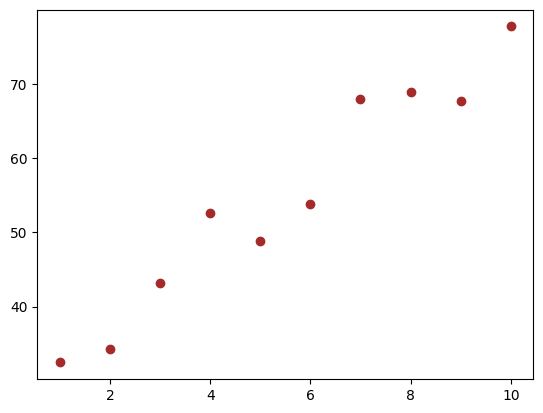

In [22]:
#STEP 8: Plot the actual data points
plt.scatter(X,Y,color='brown',label="Actual data")
#Scatter plot of actual values


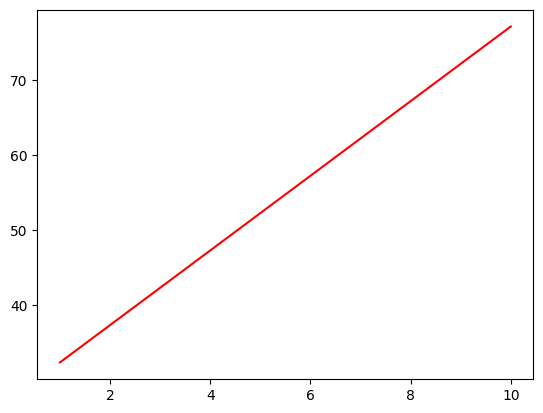

In [23]:
#Step 9: ploting the regression line(Best fit line)
plt.plot(X,y_pred,color="red",label="Best Fit Line")
#Regression line

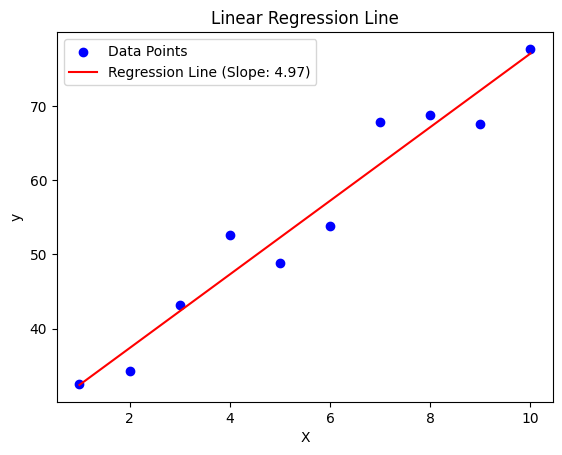

In [24]:
# predict salariews for given experience values
#Step 10

# Plot the data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label=f'Regression Line (Slope: {model.coef_[0]:.2f})')

# Labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Line')
plt.legend()

# Show the plot
plt.show()

In [ ]:
#User can input experience, and the model will predict salary
while True:
    try:
        exp=float(input("\n Enter years of experience to predict salary(or -1 to exit):"))
        if exp==1:
            break#exit the loop
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for{exp} years of experience:${predicted_salary:.2f}k")
    except ValueError:
        print("Please enter a valid number!")
        

In [25]:
from sklearn.preprocessing import PolynomialFeatures


In [26]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [27]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:12:14   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

c:\Users\cvr\Desktop\6688 project\vnv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


LinearRegression()